In [46]:
import pandas as pd
data  = pd.read_csv("breastcancer.csv")
data_verify = data.copy()

In [47]:
# for mathematical calculations
import numpy as np

# to visualize the data and results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# to build the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV


# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
data.shape

(569, 33)

In [50]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
new_column_names = {
    'concave points_mean': 'concave_points_mean',
    'concave points_se': 'concave_points_se',
    'concave points_worst': 'concave_points_worst'
}

# rename the columns using the `rename()` method
data = data.rename(columns=new_column_names)

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [53]:
data.shape

(569, 33)

In [54]:
print(data.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(data.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
32


In [55]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [56]:
print(f'Total Missing Values from the whole data set are: ', data.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(data.columns[data.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', data.columns[data.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  569
Number of Columns with Missing Values are:  1
Names of the Columns with Missing Values are:  Index(['Unnamed: 32'], dtype='object')


In [57]:
print(f'Total Number of Missing Values in the Column "Unnamed: 32" is: ',data['Unnamed: 32'].isnull().count()) #Checking the Total number of Missing values in the column 'Unnamed: 32'

Total Number of Missing Values in the Column "Unnamed: 32" is:  569


In [58]:
data.drop(columns='Unnamed: 32', inplace=True) #Droping the column'Unnamed: 32'
print('Droped Column "Unnamed: 32"')

Droped Column "Unnamed: 32"


In [59]:
print(f'There are ',data.isnull().values.sum(), ' Null Values is the Dataset')

There are  0  Null Values is the Dataset


In [60]:
data.shape

(569, 32)

# Dealing with the Label/Categorical Column

In [61]:
print(data.select_dtypes(include='object').columns) #Printing the Names on all the Categorical Columns
print(len(data.select_dtypes(include='object').columns)) #Printing the total number of Categorical Columns

Index(['diagnosis'], dtype='object')
1


In [62]:
print(f"Unique Values in Column 'diagnosis' are ['malignant' 'benign']:", data.diagnosis.unique()) #Getting all Unique Values in Column 'diagnosis'
print(f"Total Number of unique Values in Column 'diagnosis' are: ",data.diagnosis.nunique()) #Getting Total Number of unique Values in Column 'diagnosis'

Unique Values in Column 'diagnosis' are ['malignant' 'benign']: ['M' 'B']
Total Number of unique Values in Column 'diagnosis' are:  2


In [63]:
# One Hot Encoding 
data = pd.get_dummies(data=data, drop_first=True) #One Hot Encoding the Catigorical/label Column and droping the previous Column

In [64]:
data.shape

(569, 32)

In [65]:
data[['diagnosis_M']].head() #Get the One Hot Encoded Column

,diagnosis_M
0,1
1,1
2,1
3,1
4,1


In [66]:
data.shape

(569, 32)

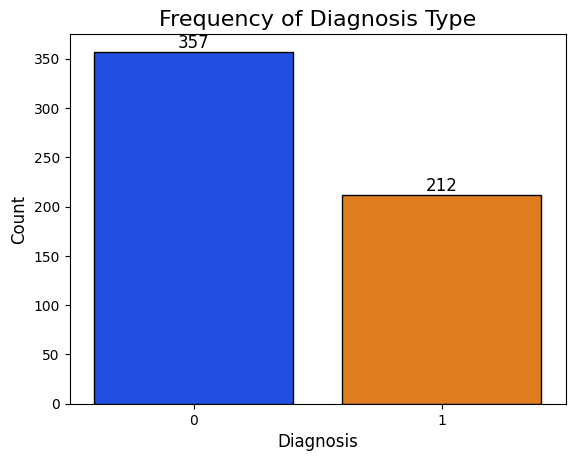

Total Values: 569


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis_M', data=data, palette='bright', edgecolor='black')

plt.title('Frequency of Diagnosis Type', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i in range(len(data['diagnosis_M'].value_counts())):
    count = data['diagnosis_M'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)

plt.show()

print(f'Total Values:',  data.diagnosis_M.count()) 

In [68]:
#Corrolation

In [69]:
#Creating a new variable witout he label column 'diagnosis_M'
df2 = data.drop(columns='diagnosis_M') 
df2.head()  #Checking the dataset if the label columns is droped in the new varibale

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


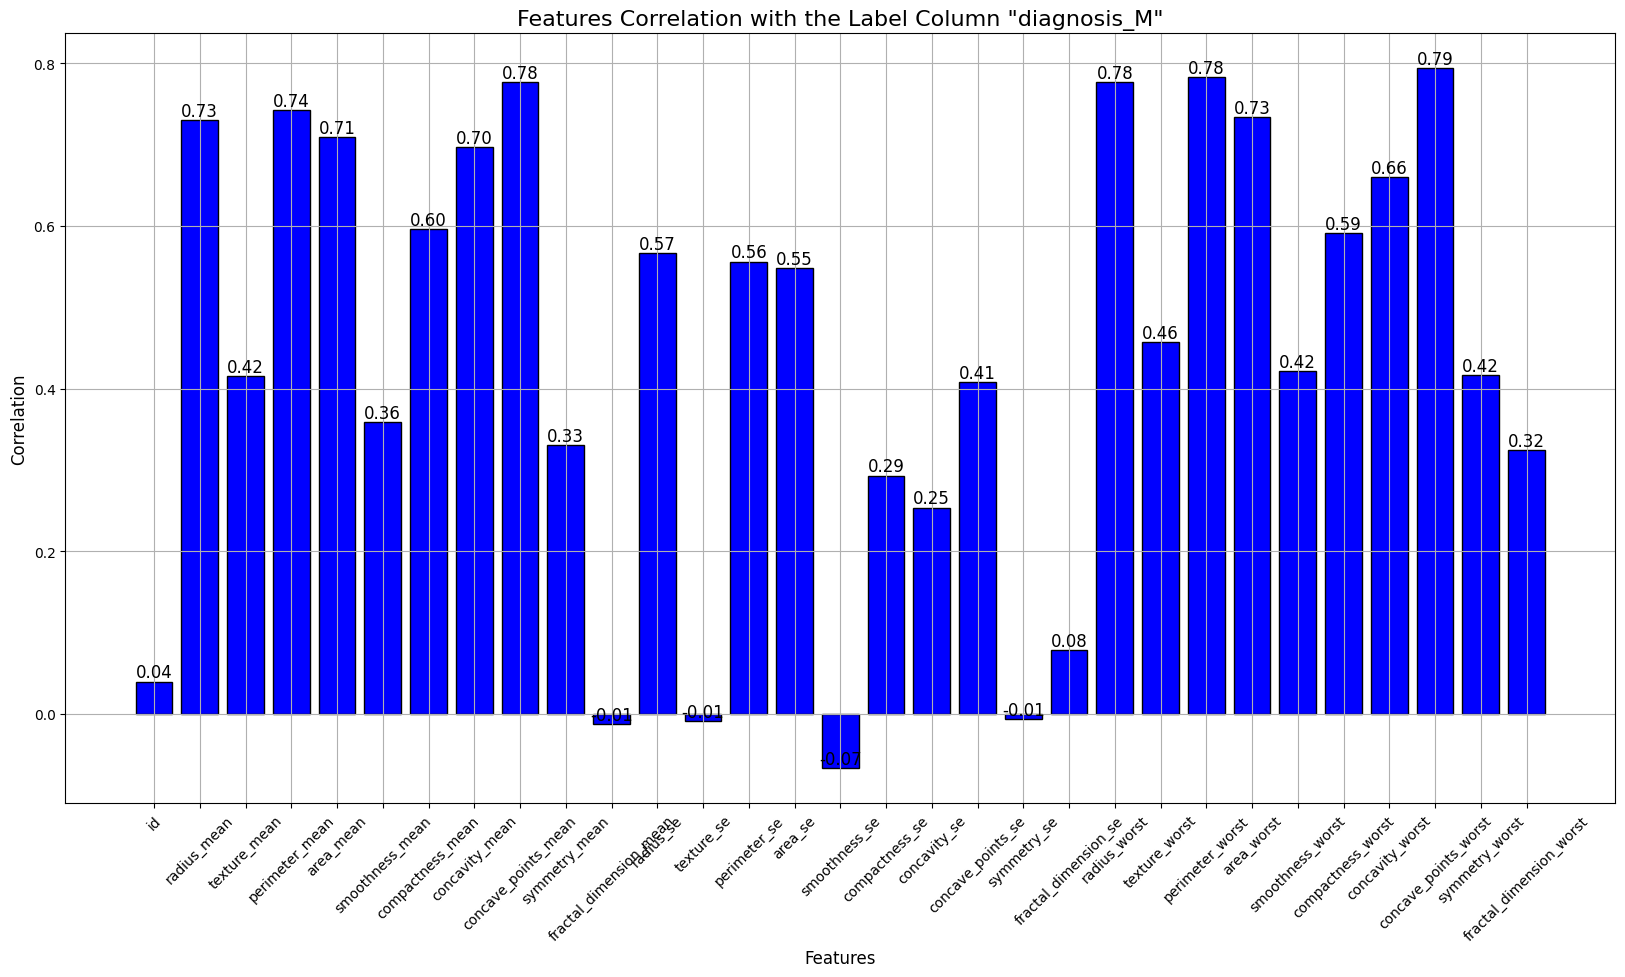

In [70]:
# Computing the correlation between the features and the label column
corrw = df2.corrwith(data['diagnosis_M'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(20, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "diagnosis_M"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

Text(220.58159722222223, 0.5, 'Features')

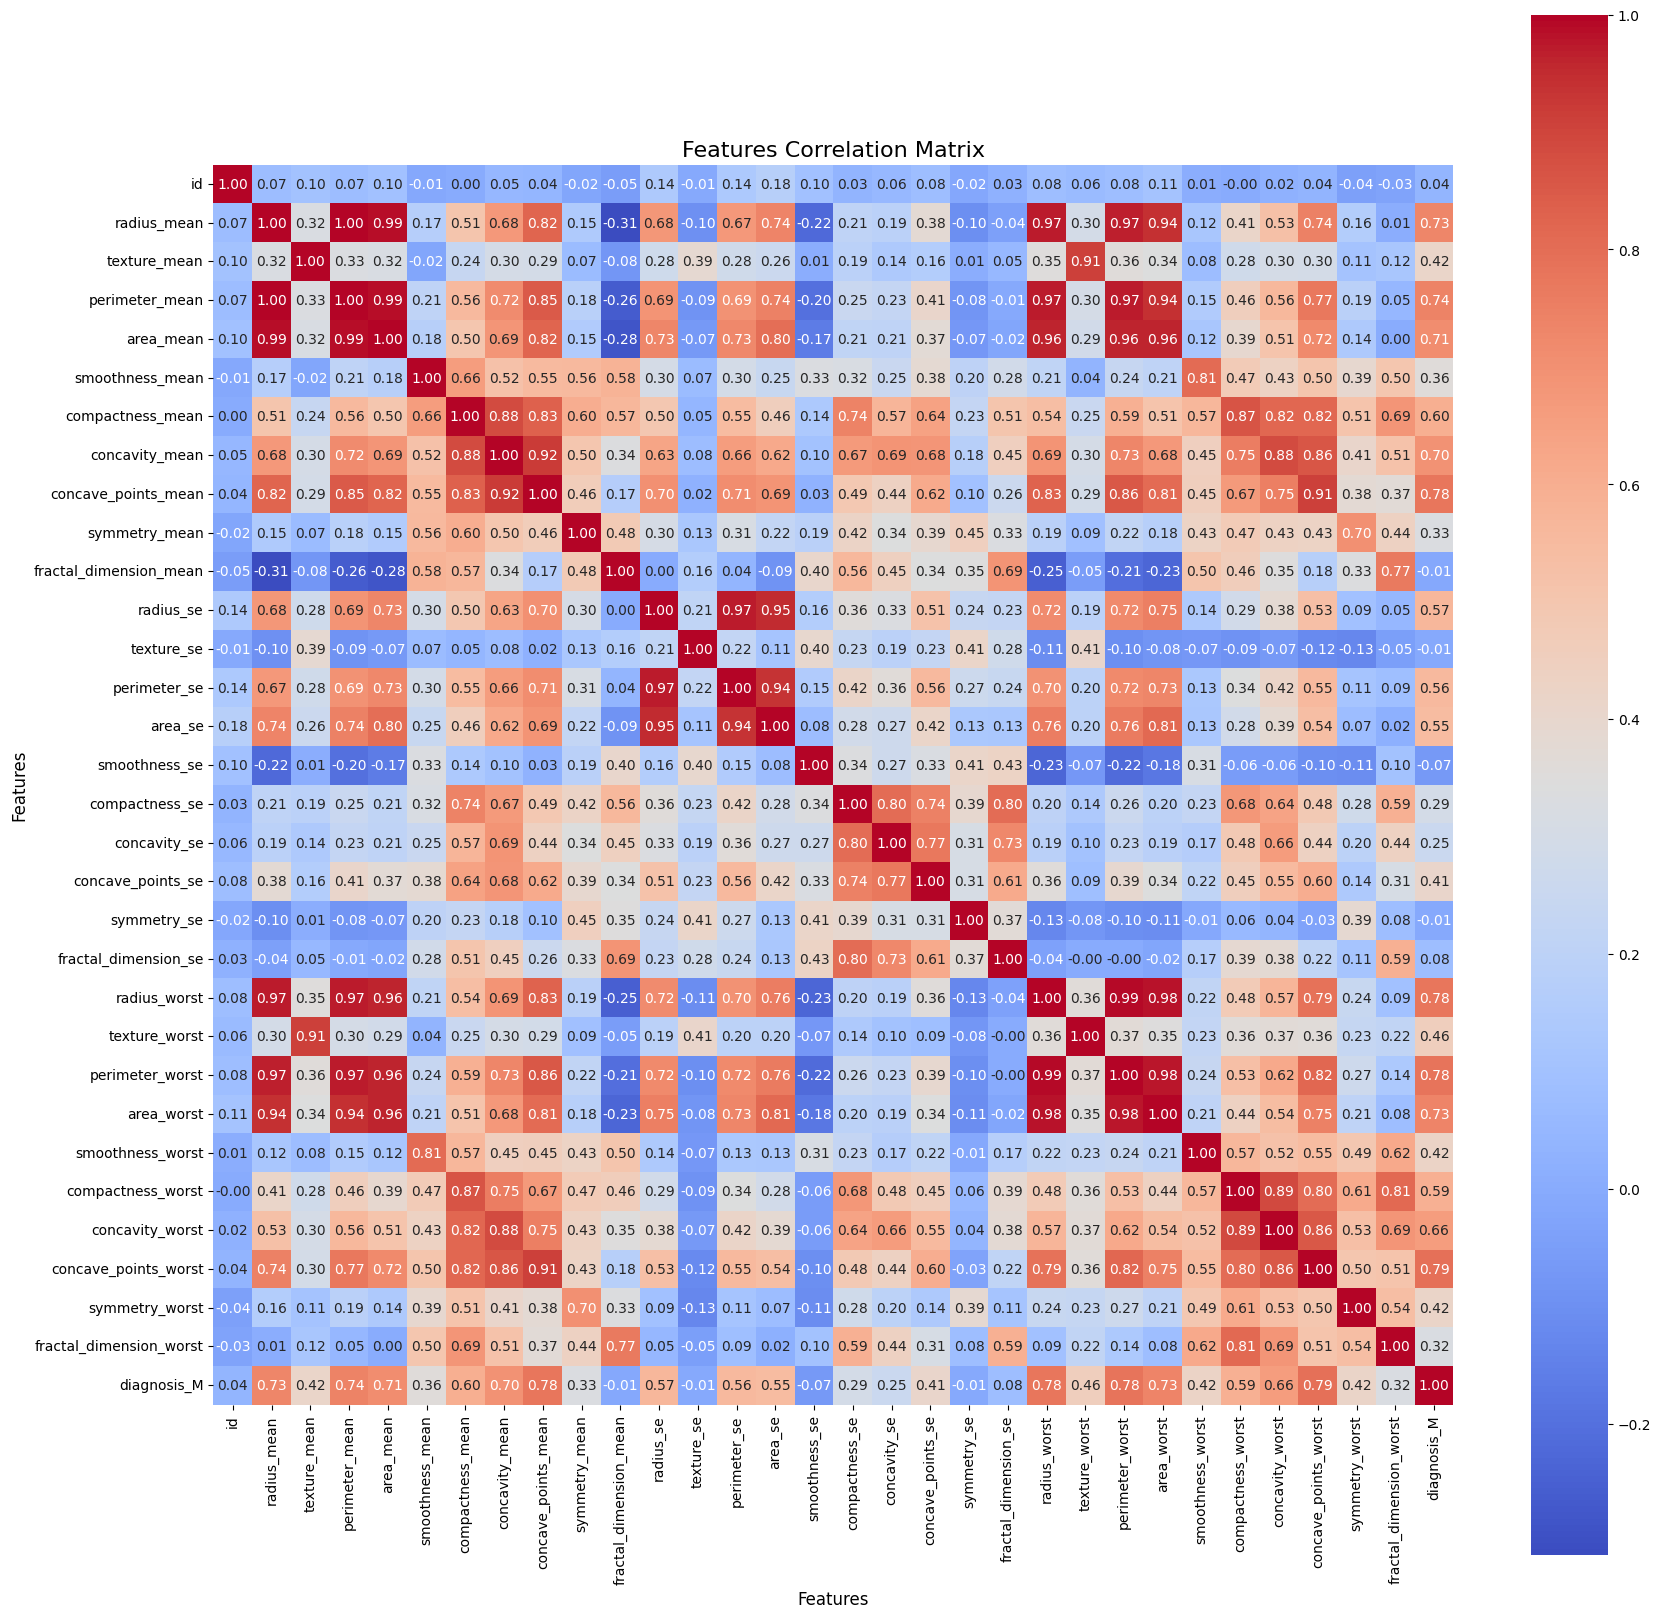

In [71]:

# Plotting a Heatmap to see in depth corrolation 
corr = data.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,20))   
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

In [72]:
#Outliers detection

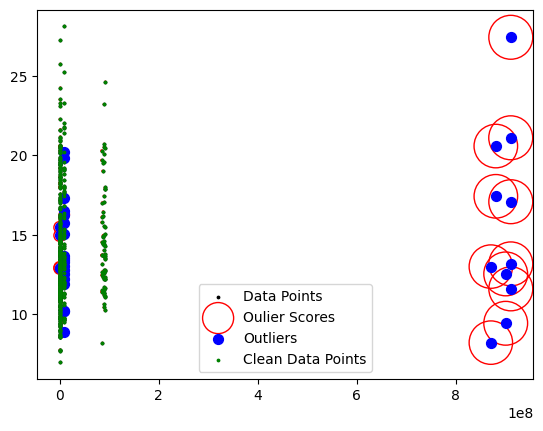

In [73]:
# outlier detection

y = data["diagnosis_M"]
x = data.drop(["diagnosis_M"], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -2.5
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

# drop outliers from the x and y variables
x_clean = x.drop(outlierIndex)
y_clean = y.drop(outlierIndex)

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.scatter(x_clean.iloc[:, 0], x_clean.iloc[:, 1], color = 'g', s = 3, label = "Clean Data Points")
plt.legend()

plt.show()


In [74]:
x.shape

(569, 31)

In [75]:
x_clean.shape

(535, 31)

In [76]:
y.shape

(569,)

In [77]:
y_clean.shape

(535,)

In [78]:

#Splitting the Dataset

In [79]:
x_clean.columns


Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [80]:

#X = x_clean.iloc[:, 1:-1] # defining the Features/Independent Variable 
#y = y_clean.values # defining the Label/Dependent/Target Variable




In [81]:
X = x_clean.iloc[:, :-1] # defining the Features/Independent Variable 
y = y_clean.values # defining the Label/Dependent/Target Variable

In [82]:
X.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst'],
      dtype='object')

In [83]:
#print(y.dtype.names)

In [84]:
print(f'Features X: ',X.shape) #Printing the Features Shape
print(f'Label Y : ',y.shape)  #Printing the Labels Shape

Features X:  (535, 30)
Label Y :  (535,)


In [85]:
# spitting the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Applying Train & Test split

In [86]:
train_id = X_train['id']
test_id = X_test['id']

X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

print("Training Data :",X_train.shape)
print("Testing Data :",X_test.shape)

Training Data : (428, 29)
Testing Data : (107, 29)


In [87]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_test',X_test.shape)    #Printing the X_test Features Shape
print(f'y_test',y_test.shape)    #Printing the y_test Labels  Shape

X_train (428, 29)
y_train (428,)
X_test (107, 29)
y_test (107,)


In [88]:
X_test = pd.DataFrame(X_test)
print(X_test.index.values)

[175 498 199 443 565 215 519 249 448 165 297  71 504 509 108 439 536 305
 407  78 141 322 135 451 219 485 261 523  45  15 191 156 242 354  17 102
 430 143 259 393 162 342 260 168 209 452 330 107 357 158 468 126  46 446
 469  96  37  21  66 402 471 561  90 309 197  85 318 252  75 389 497 365
 188 383 534 549 370 361 263 470 433 277 193 492 275 349   1 379  12 133
 103 409 254  76 314 317 282 233 329 327 332 524 392 532 238 529 333]


In [89]:
display(data_verify.loc[370])

id                         9.012315e+06
radius_mean                1.635000e+01
texture_mean               2.329000e+01
perimeter_mean             1.090000e+02
area_mean                  8.404000e+02
smoothness_mean            9.742000e-02
compactness_mean           1.497000e-01
concavity_mean             1.811000e-01
concave_points_mean        8.773000e-02
symmetry_mean              2.175000e-01
fractal_dimension_mean     6.218000e-02
radius_se                  4.312000e-01
texture_se                 1.022000e+00
perimeter_se               2.972000e+00
area_se                    4.550000e+01
smoothness_se              5.635000e-03
compactness_se             3.917000e-02
concavity_se               6.072000e-02
concave_points_se          1.656000e-02
symmetry_se                3.197000e-02
fractal_dimension_se       4.085000e-03
radius_worst               1.938000e+01
texture_worst              3.103000e+01
perimeter_worst            1.293000e+02
area_worst                 1.165000e+03


In [45]:
#print(X_train.dtype.names)

In [46]:
#Feature Scaling

In [47]:


ss= StandardScaler() #Defing the Ss variable as StandardScaler
X_train = ss.fit_transform(X_train) #Appling the fit Transform on the X_train 
#X_test = ss.transform(X_test) #Appling only transform on X_test to avoid Overfitting 

In [48]:
X_train #Checking if the X_train is scalled 

array([[ 0.5718201 ,  0.95666011,  0.4749352 , ..., -0.59325339,
        -0.20935041,  0.06293719],
       [ 1.88068438,  0.49075068,  1.93214358, ...,  1.20250264,
         1.48399651, -0.68173587],
       [ 4.03443917, -0.15453388,  4.03700014, ...,  0.24766247,
         0.69766419, -2.00559908],
       ...,
       [-0.44777658,  1.14302388, -0.30265776, ...,  4.03661114,
         1.63124407,  2.3192329 ],
       [-0.04108352, -0.69265928, -0.11998777, ..., -0.77089807,
        -1.03484755, -0.5830826 ],
       [-0.31889498, -0.65305697, -0.36244067, ..., -0.4460207 ,
        -0.47348521,  0.183867  ]])

In [49]:
#standandisation

In [50]:
# standardization

scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[ 0.5718201 ,  0.95666011,  0.4749352 , ..., -0.59325339,
        -0.20935041,  0.06293719],
       [ 1.88068438,  0.49075068,  1.93214358, ...,  1.20250264,
         1.48399651, -0.68173587],
       [ 4.03443917, -0.15453388,  4.03700014, ...,  0.24766247,
         0.69766419, -2.00559908],
       ...,
       [-0.44777658,  1.14302388, -0.30265776, ...,  4.03661114,
         1.63124407,  2.3192329 ],
       [-0.04108352, -0.69265928, -0.11998777, ..., -0.77089807,
        -1.03484755, -0.5830826 ],
       [-0.31889498, -0.65305697, -0.36244067, ..., -0.4460207 ,
        -0.47348521,  0.183867  ]])

In [52]:
#Building the Model

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score
from sklearn.naive_bayes import GaussianNB


In [54]:
# Model Building
clf_lr = GaussianNB() #Creating the NB Model
clf_lr.fit(X_train, y_train)                #Training the Model with X_train & y_train

pred_nb_train = clf_lr.predict(X_train) 
pred_nb = clf_lr.predict(X_test)                #Predicting the X_test 


#Testing the model accuracy with different paramtes
acc_tr  = accuracy_score(y_train, pred_nb_train)   # Getting the Accuracy Score 
f1_tr   = f1_score(y_train, pred_nb_train)         # Getting the f1 Score 
rec_tr  = recall_score(y_train, pred_nb_train)     # Getting the recall Score 
prec_tr = precision_score(y_train, pred_nb_train)  # Getting the Precision Score 
cm_tr   = confusion_matrix(y_train, pred_nb_train) # Getting the confusion Matrix 

#Defining a DataFrame 
results_tr_nb = pd.DataFrame([['Naive Bayes Training', acc_tr, f1_tr, rec_tr, prec_tr]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])



#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred_nb)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred_nb)         # Getting the f1 Score 
rec  = recall_score(y_test, pred_nb)     # Getting the recall Score 
prec = precision_score(y_test, pred_nb)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred_nb) # Getting the confusion Matrix 

#Defining a DataFrame 
results_nb = pd.DataFrame([['Naive Bayes testing', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])



In [55]:
#training results
results_tr_nb

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Naive Bayes Training,0.943925,0.918367,0.89404,0.944056


In [56]:
#Testing result
results_nb

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Naive Bayes testing,0.934579,0.926316,0.897959,0.956522


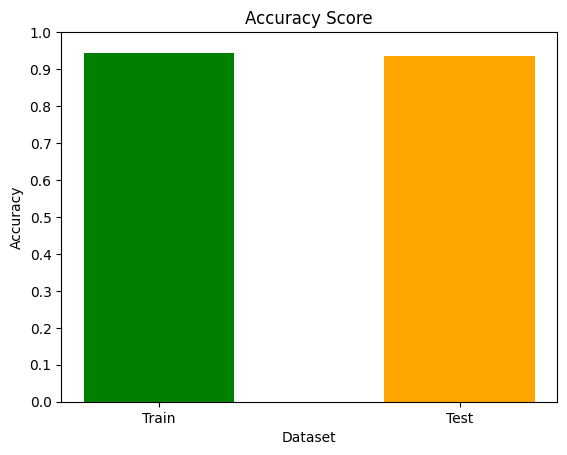

In [57]:

#plotting graph
train_acc = accuracy_score(y_train, pred_nb_train)
test_acc = accuracy_score(y_test, pred_nb)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [58]:
#Building the model 
clf_rf = RandomForestClassifier(random_state=0,max_depth=5)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train)                   #Training the Model with X_train & y_train


pred_rf_train = clf_rf.predict(X_train)                  #Predicting the X_train 
pred_rf = clf_rf.predict(X_test)                         #Predicting the X_test 


#Testing the model accuracy with different paramtes
acc_tr  = accuracy_score(y_train, pred_rf_train)   # Getting the Accuracy Score 
f1_tr   = f1_score(y_train, pred_rf_train)         # Getting the f1 Score 
rec_tr  = recall_score(y_train, pred_rf_train)     # Getting the recall Score 
prec_tr = precision_score(y_train, pred_rf_train)  # Getting the Precision Score 
cm_tr   = confusion_matrix(y_train, pred_rf_train) # Getting the confusion Matrix 

#Defining a DataFrame 
results_tr_rf = pd.DataFrame([['Random forest Training', acc_tr, f1_tr, rec_tr, prec_tr]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])



#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred_rf)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred_rf)         # Getting the f1 Score 
rec  = recall_score(y_test, pred_rf)     # Getting the recall Score 
prec = precision_score(y_test, pred_rf)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred_rf) # Getting the confusion Matrix 

#Defining a DataFrame 
results_rf = pd.DataFrame([['Random Forest testing', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])





In [59]:
results_tr_rf

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Random forest Training,0.995327,0.993333,0.986755,1.0


In [60]:
results_rf

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Random Forest testing,0.943925,0.93617,0.897959,0.977778


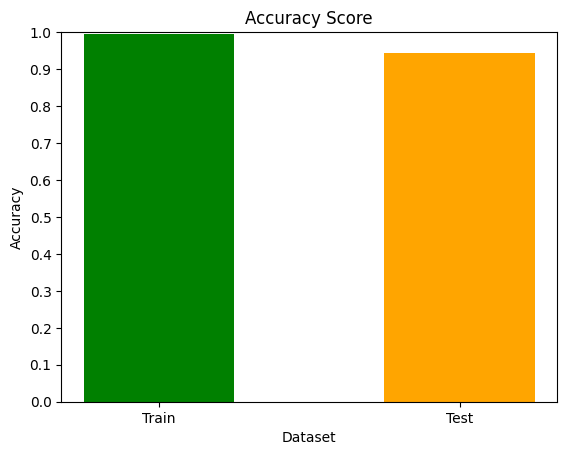

In [61]:
#plotting graph
train_acc = accuracy_score(y_train, pred_rf_train)
test_acc = accuracy_score(y_test, pred_rf)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [62]:
#NN

# import libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [63]:

# define the model
nn = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [64]:

# compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [65]:

# train the model
nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [66]:
# evaluate the model
y_pred_nn = np.round(nn.predict(X_test))
y_nn_train_pred = np.round(nn.predict(X_train))
print("TRAINING")
print('Accuracy Score:', accuracy_score(y_train, y_nn_train_pred))
print('Confusion Matrix:', confusion_matrix(y_train, y_nn_train_pred))
print('Classification Report:', classification_report(y_train, y_nn_train_pred))
print("TESTING")
print('Accuracy Score:', accuracy_score(y_test, y_pred_nn))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_nn))
print('Classification Report:', classification_report(y_test, y_pred_nn))


14/14 [==============================] - 0s 1ms/step
TRAINING
Accuracy Score: 0.9953271028037384
Confusion Matrix: [[277   0]
 [  2 149]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       277
           1       1.00      0.99      0.99       151

    accuracy                           1.00       428
   macro avg       1.00      0.99      0.99       428
weighted avg       1.00      1.00      1.00       428

TESTING
Accuracy Score: 0.9719626168224299
Confusion Matrix: [[58  0]
 [ 3 46]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.94      0.97        49

    accuracy                           0.97       107
   macro avg       0.98      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



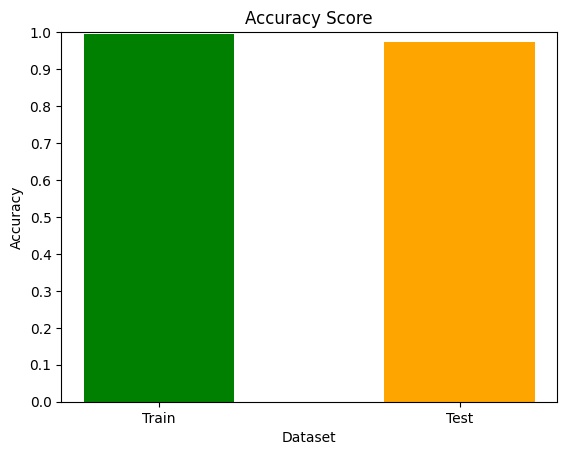

In [67]:
#plotting graph
train_acc = accuracy_score(y_train, y_nn_train_pred)
test_acc = accuracy_score(y_test, y_pred_nn)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

4/4 [==============================] - 0s 3ms/step


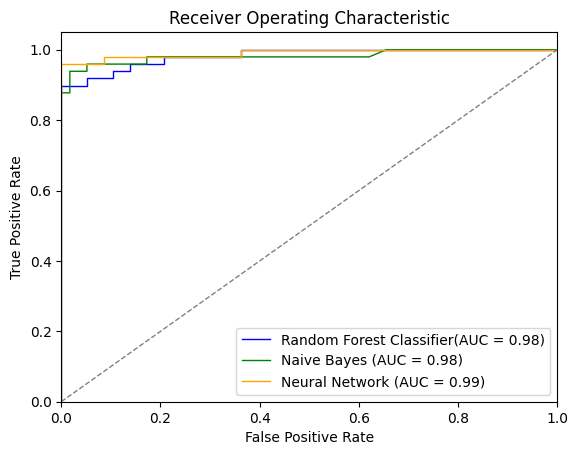

In [68]:
#ROC AUC

from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set for all three models
y_pred_proba_rf = clf_lr.predict_proba(X_test)[:, 1]
y_pred_proba_nb = clf_rf.predict_proba(X_test)[:, 1]
y_pred_proba_nn = nn.predict(X_test)[:, 0]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_logreg = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='Random Forest Classifier(AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, color='green', lw=1, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nn, tpr_nn, color='orange', lw=1, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [69]:
#gradio with 29 fetaures

# concave points_mean
# concave points_se
# concave points_worst

def input(radius_mean, texture_mean, perimeter_mean, area_mean,
       smoothness_mean, compactness_mean, concavity_mean,
       concave_points_mean, symmetry_mean, fractal_dimension_mean,
       radius_se, texture_se, perimeter_se, area_se, smoothness_se,
       compactness_se, concavity_se, concave_points_se, symmetry_se,
       fractal_dimension_se, radius_worst, texture_worst,
       perimeter_worst, area_worst, smoothness_worst,
       compactness_worst,concavity_worst,concave_points_worst,
       symmetry_worst):

    new_values = pd.DataFrame({
    'radius_mean': [radius_mean] , 
    'texture_mean': [texture_mean],
    'perimeter_mean': [perimeter_mean],    
    'area_mean': [area_mean],
    'smoothness_mean': [smoothness_mean],
    'compactness_mean': [compactness_mean],    
    'concavity_mean' : [concavity_mean],
    'concave_points_mean' : [concave_points_mean],
    'symmetry_mean' : [symmetry_mean],    
    'fractal_dimension_mean': [fractal_dimension_mean],
    'radius_se': [radius_se],
    'texture_se': [texture_se],    
    'perimeter_se': [perimeter_se],
    'area_se': [area_se],
    'smoothness_se': [smoothness_se],    
    'compactness_se': [compactness_se],
    'concavity_se' : [concavity_se],
    'concave_points_se': [concave_points_se],    
    'symmetry_se' : [symmetry_se],
    'fractal_dimension_se': [fractal_dimension_se],
    'radius_worst': [radius_worst],    
    'texture_worst': [texture_worst],
    'perimeter_worst': [perimeter_worst],
    'area_worst': [area_worst],
    'smoothness_worst': [smoothness_worst],
    'compactness_worst': [compactness_worst],  
    'concavity_worst': [concavity_worst],  
    'concave_points_worst' : [concave_points_worst],
    'symmetry_worst': [symmetry_worst]  

    })
    new_values_scaled = ss.transform(new_values)
    new_prediction = nn.predict(new_values_scaled)
    return new_prediction


In [71]:
#gradio with 29 fetaures
import gradio as gr
demo = gr.Interface(fn=input,
                    inputs=["number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number"],
                    outputs=['text'],
                    title="Breast Cancer prediction using Winconsin Breast Cancer Dataset",
                    theme='dark'
                    # theme='huggingface',
                    # css = """ ,
                    # body {background-color : grey}
                    # """
                    )


demo.launch() 

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [72]:
import pickle

with open('breastcancer_model.pkl','wb') as files:
    pickle.dump(nn,files)

In [74]:
# import pickle

# save the scaler object to a file
with open('scalerbreast.pkl', 'wb') as f:
    pickle.dump(ss, f)

#feature selection

In [63]:
# pip install boruta


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: boruta in c:\users\lenovo gein\appdata\local\programs\python\python310\lib\site-packages (0.3)




[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Create a Boruta feature selector object
boruta_feature_selector = BorutaPy(estimator=rf, n_estimators='auto', max_iter=100, random_state=42)

# Fit the Boruta feature selector to the data
boruta_feature_selector.fit(X_train, y_train)


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=149, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x220E556BA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x220E556BA40)

In [65]:
boruta_feature_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
print("No.of significant features: ",boruta_feature_selector.ranking_)

No.of significant features:  [1 1 1 1 1 1 1 1 1 1 1 4 1 1 3 2 1 1 2 1 1 1 1 1 1 1 1 1 1]


In [67]:
print("No. of significant features: ", boruta_feature_selector.n_features_)

No. of significant features:  25


In [68]:
# Transform the data to include only the selected features
X_train_selected = boruta_feature_selector.transform(X_train)
X_test_selected = boruta_feature_selector.transform(X_test)


In [69]:
X_train_selected.shape

(428, 25)

In [70]:
X_test_selected.shape

(107, 25)

In [82]:
# Model Building
clf_lr_fs = GaussianNB() #Creating the NB Model
clf_lr_fs.fit(X_train_selected, y_train)                #Training the Model with X_train & y_train
pred_nb_fs = clf_lr_fs.predict(X_test_selected)                #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred_nb_fs)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred_nb_fs)         # Getting the f1 Score 
rec  = recall_score(y_test, pred_nb_fs)     # Getting the recall Score 
prec = precision_score(y_test, pred_nb_fs)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred_nb_fs) # Getting the confusion Matrix 

#Defining a DataFrame 
results_lr = pd.DataFrame([['Naive Bayes', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])


#Printing the Model Results with different Metrics
results_lr

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Naive Bayes,0.943925,0.93617,0.897959,0.977778


In [83]:
#Building the model 
clf_rf_fs = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf_fs.fit(X_train_selected, y_train)                   #Training the Model with X_train & y_train
pred_rf_fs = clf_rf_fs.predict(X_test_selected)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred_rf_fs)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred_rf_fs)         # Getting the f1 Score 
rec  = recall_score(y_test, pred_rf_fs)     # Getting the recall Score 
prec = precision_score(y_test, pred_rf_fs)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred_rf_fs) # Getting the confusion Matrix 

#Defining a DataFrame 
results_rf = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])



#Printing the Model Results with different Metrics
results_rf

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Random Forest Classifier,0.943925,0.93617,0.897959,0.977778


In [84]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = pred_rf_fs.astype(int)
sub['Origin_Type'] = y_test
#sub['Correct'] = test_correct
sub.head(50)

,id,Predict_Type,Origin_Type
175,872113,0,0
498,914769,1,1
199,877500,1,1
443,909777,0,0
565,926682,1,1
215,8810987,1,1
519,917080,0,0
249,884689,0,0
448,911150,0,0
165,8712291,0,0


In [85]:
sub[['id','Predict_Type']].to_csv('basic_submission.csv',index=False)

In [69]:
#NN With reduced features

In [70]:
# define the model
nn_new = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train_selected.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [71]:

# compile the model
nn_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [72]:

# train the model
nn_new.fit(X_train_selected, y_train, epochs=100, batch_size=32, verbose=0)


In [73]:
# evaluate the model
y_pred_nn_new = np.round(nn_new.predict(X_test_selected))
print('Accuracy Score:', accuracy_score(y_test, y_pred_nn_new))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_nn_new))
print('Classification Report:', classification_report(y_test, y_pred_nn_new))

Accuracy Score: 0.9813084112149533
Confusion Matrix: [[58  0]
 [ 2 47]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.96      0.98        49

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



In [76]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = y_pred_nn_new.astype(int)
sub['Origin_Type'] = y_test

sub.head(50)

,id,Predict_Type,Origin_Type
175,872113,0,0
498,914769,1,1
199,877500,1,1
443,909777,0,0
565,926682,1,1
215,8810987,1,1
519,917080,0,0
249,884689,0,0
448,911150,0,0
165,8712291,0,0


In [264]:
import gradio as gr